# OpenCV를 이용한 이미지 처리 기초
- OpenCV는 컴퓨터로 이미지나 영상을 읽고, 이미지의 사이즈 변환이나 회전, 선분 및 도형 그리
기, 채널 분리 등의 연산을 처리할 수 있도록 만들어진 오픈 소스 라이브러리로, 이미지 처리 분야
에서 가장 많이 사용된다

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('resources/lenna.png')

이미지 크기는 512x512이고 3개 채널로 이루어져 있다

In [3]:
img.shape

(512, 512, 3)

이미지 픽셀당 8bit이다 (24비트 트루컬러)

In [4]:
img[:, :, 0]

array([[125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       ...,
       [ 60,  60,  58, ...,  84,  76,  79],
       [ 57,  57,  62, ...,  79,  81,  81],
       [ 57,  57,  62, ...,  79,  81,  81]], dtype=uint8)

In [5]:
def show_image(img, method = "plt"):
    if method == "plt":
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    elif method == "cv2":
        cv2.imshow("Image",img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    elif method == "colab":
        from google.colab.patches import cv2_imshow
        cv2_imshow(img)

def show_image_list(title_to_img_dict, figsize):
    n = len(title_to_img_dict)
    fig, axes = plt.subplots(1, n, figsize=figsize)


    for i, (title, img) in enumerate(title_to_img_dict.items()):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(title)
        # axes[i].axis('off')

    # plt.tight_layout()
    plt.show()


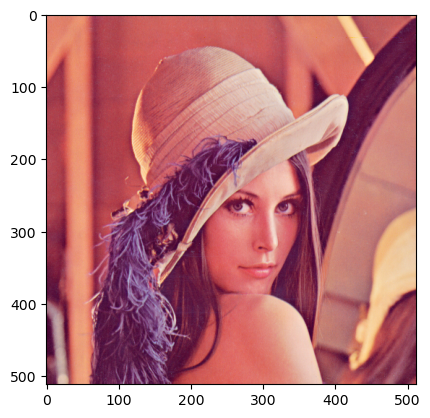

In [6]:
show_image(img)

이미지 크기를 리사이즈 할수 있다

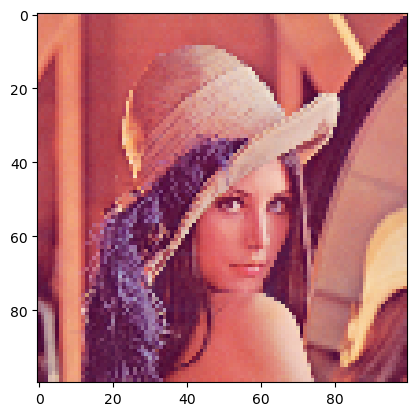

In [7]:
image_small = cv2.resize(img,(100,100))
show_image(image_small)

이미지를 상하/좌우로 뒤집을 수 있다

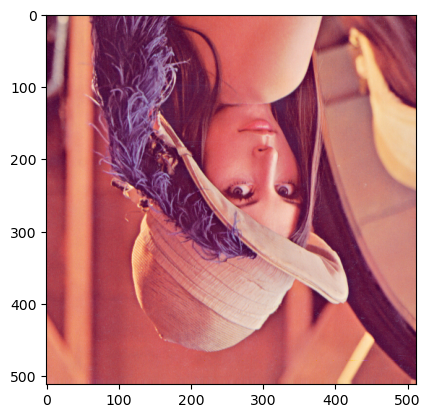

In [8]:
image_fliped = cv2.flip(img, 0)
show_image(image_fliped)

array slicing으로 이미지의 일부 영역을 가져올 수 있다

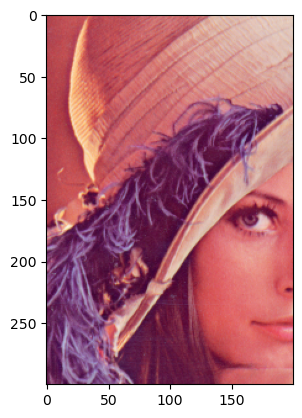

In [9]:
img_sliced = img[100:400, 100:300, :]
show_image(img_sliced)

<mark>과제</mark> 이미지의 특정 사각 영역을 전달받은 색상값 fill_color로 채워넣는 cutout함수를 작성하라 (cutout augmentation에 쓰임) 

In [12]:
def cutout_image(src_img, top_left_corner, bottom_right_corner, fill_color):
    """
    이 함수는 이미지의 사각 영역을 fill_color값으로 채운다. 시작점과 끝점은 top_left_corner, bottom_right_corner 변수에 의해 지정된다.
    row -> y축, col -> x축에 대응되며, cv2.imread함수는 dim 0가 y축, dim 1이 x축에 대응됨에 주의할것.
    힌트: array slicing을 이용할것

    Args:
        src_img (numpy.ndarray): The source image to modify.
        top_left_corner (tuple): The (row, col) coordinates of the top-left corner of the cutout region.
        bottom_right_corner (tuple): The (row, col) coordinates of the bottom-right corner of the cutout region.
        fill_color (int or tuple): The color or intensity value to fill the cutout region with. 
                                   For grayscale images, use an integer value. For RGB images, use a tuple of 3 values.

    Returns:
        numpy.ndarray: The modified image with the cutout applied.
    """

    modified_img = src_img.copy() # src_img를 보존하기 위해 deep copy를 수행한다

    ##### YOUR CODE START #####
    t_row, t_col = top_left_corner
    b_row, b_col = bottom_right_corner
    
    modified_img[t_row:b_row+1, t_col:b_col+1,:] = fill_color

    ##### YOUR CODE END #####
    
    return(modified_img)



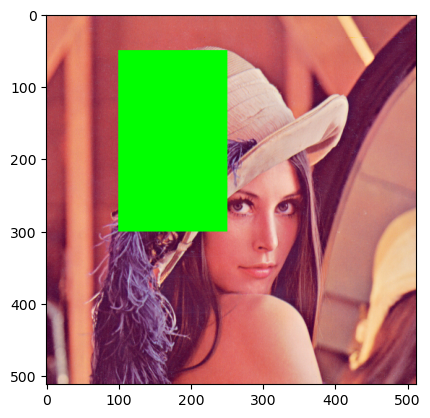

In [13]:
show_image(cutout_image(img, top_left_corner = (50,100), bottom_right_corner = (300, 250), fill_color = (0, 255, 0)))

선이나 도형을 그릴 수 있다

In [14]:
def draw_line_on_image(src_img):
    modified_img = src_img.copy()
    modified_img = cv2.line(modified_img, pt1 = (100,50), pt2 = (300,200), color = (255,0,0), thickness = 3)
    return(modified_img)

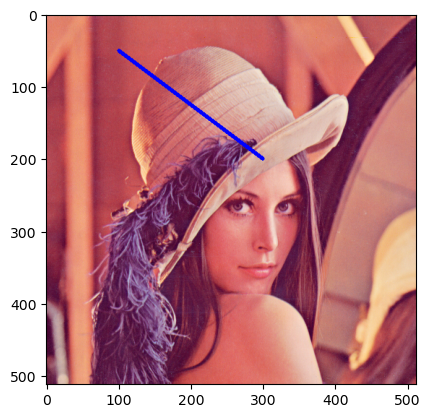

In [15]:
show_image(draw_line_on_image(src_img = img))

In [16]:
def draw_circle_on_image(src_img):
    modified_img = src_img.copy()
    modified_img = cv2.circle(modified_img, center = (150, 150), radius = 50, color = (0,0,0), thickness = 2)
    return modified_img


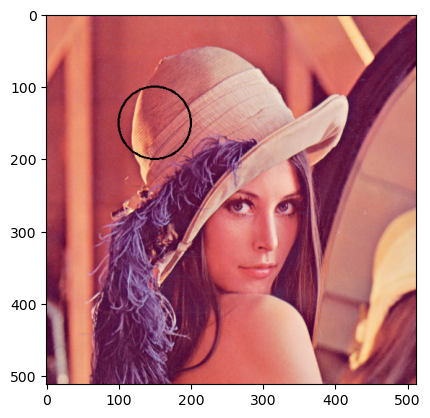

In [17]:
show_image(draw_circle_on_image(img))

In [18]:
def draw_poly_on_image(src_img):
    modified_img = src_img.copy()

    points = np.array([[256, 100], [100, 200], [150, 400], [362, 400]])
    
    modified_img = cv2.fillPoly(modified_img, [points], color = (255, 255, 255), lineType = 1)
    return modified_img

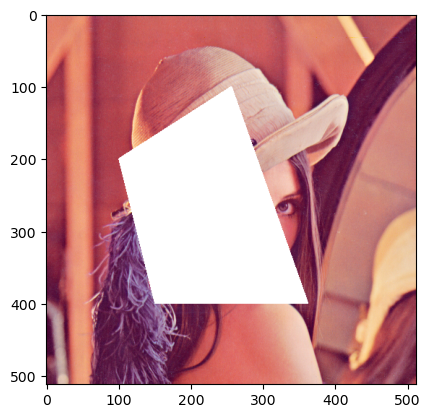

In [19]:
show_image(draw_poly_on_image(img))

### Affine transformation and perspective transformation
1. 어파인 변환 (Affine transformation): 점, 직선, 평면을 보존하는 선형 변환으로 변환 전에 평행이였던 선들은 변환 후에도 평행성이 보존된다.

$\begin{pmatrix}x'\\y'\\ \end{pmatrix}$ = $\begin{pmatrix}a&b\\c&d\\ \end{pmatrix}$ $\begin{pmatrix}x\\y\\ \end{pmatrix}$ + $\begin{pmatrix}tx\\ty\\ \end{pmatrix}$ 

2. 원근 변환 (Perspective transformation): 이미지를 다른 관점에서 보는 것처럼 변환한다.

$\begin{pmatrix}x'\\y'\\w'\\ \end{pmatrix}$ = $\begin{pmatrix}a&b&c\\d&e&f\\g&h&1\\ \end{pmatrix}$ $\begin{pmatrix}x\\y\\1\\ \end{pmatrix}$ 

In [20]:
def rotate_image(src_img, degree):
    """
    이미지를 degree만큼 회전시킨다.
    가장자리는 검은색으로 채워 넣는다
    """

    height, width, channel = src_img.shape
    aff_matrix = cv2.getRotationMatrix2D(center = (width/2, height/2), angle = degree, scale = 1)
    print(f"Affine transform matrix is: ")
    print(aff_matrix)
    img_rotated = cv2.warpAffine(src = src_img, M = aff_matrix, dsize = (width, height), 
                                 borderValue=(0,0,0))
    return(img_rotated)

Affine transform matrix is: 
[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


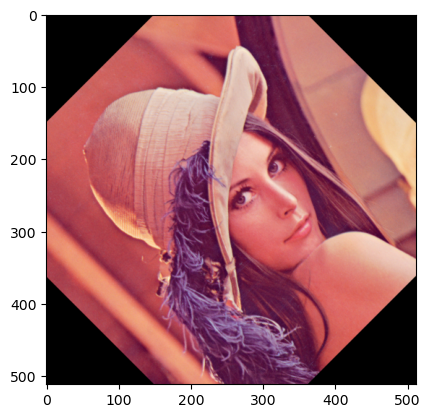

In [21]:
show_image(rotate_image(img, 45))

In [22]:
def perspective_transform_image(src_img):
    ordered_corners = np.array([[57, 630], [936, 330], [1404, 792], [550, 1431]], dtype='float32')

    # 너비와 높이 계산
    ordered_width = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[1]), 
                            np.linalg.norm(ordered_corners[2] - ordered_corners[3]))) 
    ordered_height = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[3]), 
                            np.linalg.norm(ordered_corners[1] - ordered_corners[2])))
    # 변환이 될 꼭짓점 좌표 지정
    ordered_rect_corners = np.array([[0, 0], [ordered_width, 0], [ordered_width, ordered_height], [0, ordered_height]], dtype='float32')

    # 호모그래피 행렬 계산
    ordered_scan_matrix = cv2.getPerspectiveTransform(ordered_corners, ordered_rect_corners)
    # 원근 변환 다시 적용
    ordered_scanned_image = cv2.warpPerspective(src_img, ordered_scan_matrix, (ordered_width, ordered_height))
    return(ordered_scanned_image)

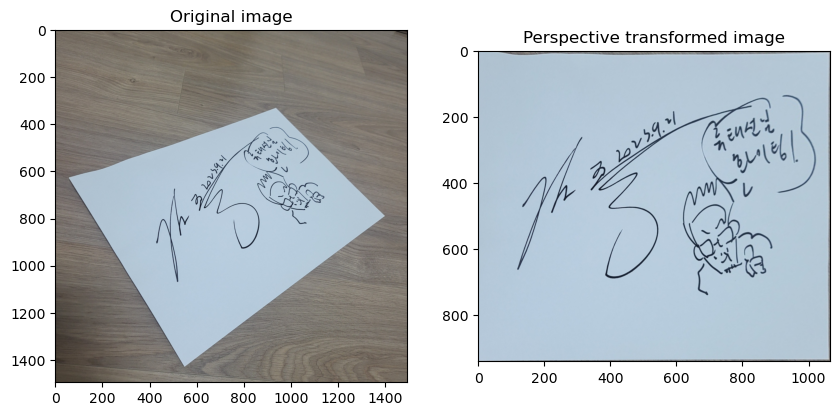

In [23]:
scan_img = cv2.imread("resources/perspective_test.jpg")
transformed_scan_img = perspective_transform_image(scan_img)

show_image_list({"Original image": scan_img, 
                 "Perspective transformed image" : transformed_scan_img}, 
                figsize = (10,5))

# Image Processing

### Gaussian Filter

In [24]:
def add_gaussian_noise(src_img, mean = 0, sigma = 1):
    gaussian_noise=np.random.normal(mean, sigma, src_img.shape).astype('float32')
    
    noisy_image = src_img.astype('float32') + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    noisy_image = noisy_image.astype('uint8')
    return(noisy_image)

In [25]:
def gaussian_kernel(size, sigma=1):
    """
    Generates a Gaussian kernel.
    
    Args:
        size (int): The size of the kernel (should be odd).
        sigma (float): The standard deviation of the Gaussian function.
        
    Returns:
        numpy.ndarray: The Gaussian kernel.
    """
    k = (size - 1) // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal
    return g / g.sum()


In [26]:
gaussian_kernel(5, 1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

<mark>과제</mark> 커널 사이즈와 표준편차를 전달받아 전달받은 이미지에 가우시안 블러를 적용하는 함수를 작성하라.

cv2.filter2D 함수를 이용할것.

Function: `cv2.filter2D(src, ddepth, kernel, ...)`

**Arguments:**

- **`src`**: 필터를 적용할 소스 이미지.
- **`ddepth`**: 출력 이미지의 깊이 (-1일 경우 입력이미지와 동일하게 만듬)
- **`kernel`**: 커널로 사용할 2차원 행렬

In [31]:
def apply_gaussian_blur(src_img, kernel_size=5, sigma=1):
    """
    가우시안 커널을 계산하여 이미지에 적용한다

    Args:
        src_img (numpy.ndarray): source 이미지
        kernel_size (int): 가우시안 커널의 크기 (홀수여야 함).
        sigma (float): 가우시안 커널을 계산할때 사용할 표준편자 값
    
    Returns:
        numpy.ndarray: The blurred image.
    """
    
    ##### YOUR CODE START #####
    kernel = gaussian_kernel(kernel_size, sigma)
    img = cv2.filter2D(src_img, -1, kernel)
    return img
    ##### YOUR CODE END #####
    


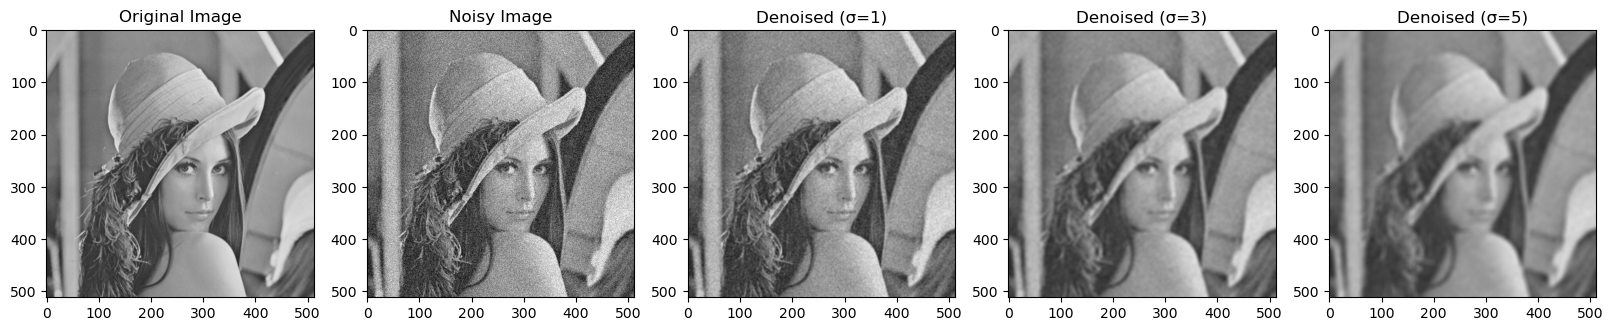

In [32]:
gray_img = cv2.imread('resources/lenna.png', cv2.IMREAD_GRAYSCALE)
noisy_image = add_gaussian_noise(gray_img, mean = 0, sigma = 25)


show_image_list({'Original Image': gray_img,
                 'Noisy Image': noisy_image,
                 'Denoised (σ=1)' : apply_gaussian_blur(noisy_image, 5, 1),
                 'Denoised (σ=3)' : apply_gaussian_blur(noisy_image, 9, 3),
                 'Denoised (σ=5)' : apply_gaussian_blur(noisy_image, 13, 5),
                 },
                figsize=(20, 10))


Median filter를 사용하면 salt & pepper noise를 효율적으로 제거할 수 있다

In [ ]:
def add_salt_noise(image):
    num_salt = np.ceil(0.05 * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    salted_image = image.copy()
    salted_image[coords[0], coords[1]] = 255
    
    return salted_image

In [ ]:
def add_pepper_noise(image):
    num_pepper = np.ceil(0.05 * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    peppered_image = image.copy()
    peppered_image[coords[0], coords[1]] = 0
    return peppered_image

In [ ]:
salted_img = add_salt_noise(gray_img)
peppered_img = add_pepper_noise(salted_img)
median_filtered_img = cv2.medianBlur(peppered_img, ksize = 5)

show_image_list({'Original Lenna Image': gray_img,
                 'Salted Lenna Image': salted_img,
                 'Salted & Peppered Lenna' : peppered_img,
                 'Median Filtered Lenna' : median_filtered_img,
                 },
                figsize=(15, 8))

소벨 필터를 이용한 edge 검출

In [ ]:
img = cv2.imread("resources/sudoku.jpg")

kx = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
ky = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])

sobel_x = cv2.filter2D(img, ddepth = -1, kernel = kx) # same with cv2.Sobel(img, ddepth = -1, dx = 1, dy 0, ksize=3)
sobel_y = cv2.filter2D(img, ddepth = -1, kernel = ky) # same with cv2.Sobel(img, ddepth = -1, dx = 0, dy = 1, ksize=3) 
sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)


print("kernel_x: ")
print(kx,"\n")
print("kernel_y: ")
print(ky)
show_image_list({'Original Image': img,
                 'Sobel_x': sobel_x,
                 'Sobel_y' : sobel_y,
                 'Sobel merged' : sobel,
                 },
                figsize=(20, 6))


그 외에도 다양한 엣지검출기들이 있다

In [ ]:
img = cv2.imread("resources/sudoku.jpg", cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(img, (5, 5), 1.4)
canny_edges = cv2.Canny(blurred_image, threshold1=10, threshold2=50)

show_image_list({'Original Image': img,
                 'Gaussian Blurred Image': blurred_image,
                 'Canny Edge Detection' : canny_edges,
                 },
                figsize=(20, 6))
